W의 값: w1 = 8.6420, w2 = -9.4432
b의 값은 1.8125


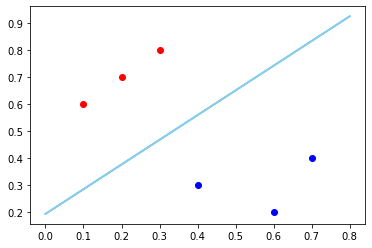

In [3]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('ann_data.csv')

w = [0.5, 0.5]
b = 0
mu = 0.1

x1 = np.array(df.iloc[:, 0:1])
x2 = np.array(df.iloc[:, 1:2])
tn = np.array(df.iloc[:, 2:3])

def sigmoid_list(x_list):
    y = np.zeros((len(x_list), 1))
    
    for i in range(len(x_list)):
        y[i] = 1 / ( 1 + math.exp(-x_list[i]))

    return y

def zeta(w, b, x1, x2):
    z = np.zeros((6, 1))
    
    for i in range(6):
        z[i] = w[0]*x1[i] + w[1]*x2[i] + b
    
    return z

for i in range(10000):
    y = sigmoid_list(zeta(w, b, x1, x2))
    ym = np.ones((6,1)) - y
    
    w0 = 0
    w1 = 0
    bp = 0
    
    for j in range(6):
        w0 += mu * (tn[j] - y[j]) * y[j] * ym[j] * x1[j]
        w1 += mu * (tn[j] - y[j]) * y[j] * ym[j] * x2[j]
        bp += mu * (tn[j] - y[j]) * y[j] * ym[j]
    
    w[0] += w0[0]
    w[1] += w1[0]
    b += bp[0]

print("W의 값: w1 = %.4f, w2 = %.4f" %(w[0], w[1]))
print("b의 값은 %.4f" %b)

def visualize(df, w, b):
    for i in range(len(df)):
        x1_1 = 0
        y1_1 = (-w[0] * x1_1 - b) / w[1]
        
        x1_2 = 0.8
        y1_2 = (-w[0] * x1_2 - b) / w[1]
        
        if df.iloc[i, 2] == 1:
            plt.plot(df.iloc[i, 0], df.iloc[i, 1], 'bo')
        else:
            plt.plot(df.iloc[i, 0], df.iloc[i, 1], 'ro')
        
        plt.plot([x1_1, x1_2], [y1_1, y1_2], 'skyblue')

visualize(df, w, b)